In [ ]:
!conda install -c conda-forge wordcloud

In [24]:
import sys
print(sys.executable)

C:\Users\hilak\anaconda3\python.exe


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [10]:
chunk_size = 100000  # Adjust this size based on memory capacity

# Set the base directory manually if needed
base_dir = os.path.dirname(os.getcwd()) # or specify the folder manually
file_path = os.path.join(base_dir, "data", "train_reviews.csv")

if os.path.exists(file_path):
    print(f"Loading file from: {file_path}")
    train_reviews_chunk = pd.read_csv(file_path, nrows=chunk_size)
    print(train_reviews_chunk.head())
else:
    print(f"File not found: {file_path}")


Loading file from: C:\Users\hilak\PycharmProjects\booking_kaggel_compatitiom\data\train_reviews.csv
                              review_id  accommodation_id  \
0  bf762eec-0e44-42ff-a066-6be55a7d0849         489020669   
1  3f1a116f-38ed-4fe8-9086-fd71b0f994f9        1533822482   
2  2cfd21e7-4e2d-4a31-be9d-9e22c705d76d         222537300   
3  a240f502-0ee3-47e3-964b-786b56ed5083         644485349   
4  5086e380-21d4-4d5c-be6f-f2d04a57e0ac        -192152850   

                                    review_title  \
0  Nice &amp; friendly , Plenty of staff around.   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

                                     review_positive  \
0  Really nice staff. Good food.Fridge with fresh...   
1  The staff was helpful and the room was comfort...   
2  &quot;Home Sweet Home&quot; is a delightful ho...

In [11]:
# Basic information
print(train_reviews_chunk.info())  # Column data types and non-null counts

# Summary statistics for numerical columns
print(train_reviews_chunk.describe())

# Check for missing values
missing_values = train_reviews_chunk.isnull().sum()
print("Missing values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   review_id             100000 non-null  object 
 1   accommodation_id      100000 non-null  int64  
 2   review_title          67329 non-null   object 
 3   review_positive       99999 non-null   object 
 4   review_negative       71236 non-null   object 
 5   review_score          100000 non-null  float64
 6   review_helpful_votes  100000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB
None
       accommodation_id   review_score  review_helpful_votes
count      1.000000e+05  100000.000000         100000.000000
mean       4.696421e+06       8.863269              0.123210
std        1.235953e+09       1.168383              0.624895
min       -2.147447e+09       1.000000              0.000000
25%       -1.054688e+09       8.000000             

In [12]:
# Fill missing values for text fields
train_reviews_chunk['review_title'].fillna("No Title", inplace=True)
train_reviews_chunk['review_positive'].fillna("No Positive Review", inplace=True)
train_reviews_chunk['review_negative'].fillna("No Negative Review", inplace=True)

# Drop rows with missing `review_score` if it’s critical
train_reviews_chunk.dropna(subset=['review_score'], inplace=True)

# Verify changes
print(train_reviews_chunk.isnull().sum())

review_id               0
accommodation_id        0
review_title            0
review_positive         0
review_negative         0
review_score            0
review_helpful_votes    0
dtype: int64


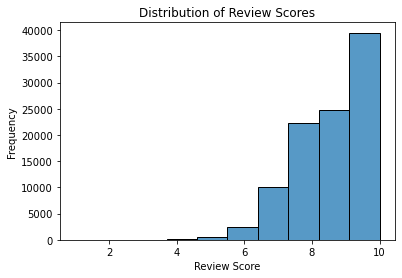

In [13]:
# Distribution of review scores
sns.histplot(train_reviews_chunk['review_score'], kde=False, bins=10)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

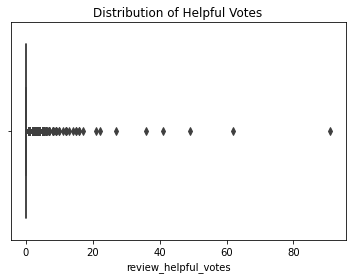

                                  review_id  accommodation_id  \
40413  e99671ef-5091-4e54-8700-a6e4d66e1c11         321160175   
77816  3dcb36bc-a09b-4aac-8ec9-d7ad46732bec       -1879783390   
66593  32cfba8c-9374-463a-9294-d6b7ed202aed          76946692   
59233  836f18ae-6cc9-419a-9a2c-552de185c7eb         321160175   
30139  d8481dcf-d691-4e8d-8f45-68adae6f49b9       -1879783390   

                                        review_title  \
40413                              Very comfortable.   
77816                                       No Title   
66593                                       No Title   
59233                                           Good   
30139  Wonderful stay, great food and fantastic host   

                                         review_positive  \
40413  The location was good, the room is cleaned eve...   
77816  Everything was great! The apartment (on 2 floo...   
66593  Good location, near Rainbow Street and downtow...   
59233  The staff was very friend

In [14]:
# Plot helpful votes
sns.boxplot(x=train_reviews_chunk['review_helpful_votes'])
plt.title("Distribution of Helpful Votes")
plt.show()

# Top helpful reviews
print(train_reviews_chunk.sort_values(by='review_helpful_votes', ascending=False).head())

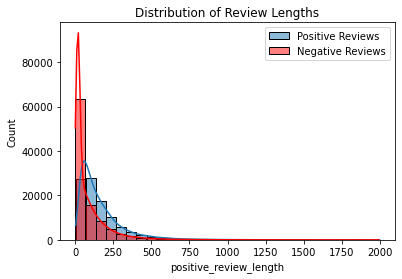

In [15]:
# Add a column for review text length
train_reviews_chunk['positive_review_length'] = train_reviews_chunk['review_positive'].apply(len)
train_reviews_chunk['negative_review_length'] = train_reviews_chunk['review_negative'].apply(len)

# Plot the distribution of review lengths
sns.histplot(train_reviews_chunk['positive_review_length'], bins=30, kde=True, label="Positive Reviews")
sns.histplot(train_reviews_chunk['negative_review_length'], bins=30, kde=True, color='red', label="Negative Reviews")
plt.legend()
plt.title("Distribution of Review Lengths")
plt.show()

In [19]:

# Combine all positive reviews
text = " ".join(review for review in train_reviews_chunk['review_positive'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined